<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# The Bias-Variance Tradeoff

_Authors: Matt Brems, Dave Yerrington, Tim Book, Noelle Brown_

---


## Learning Objectives

- Describe error due to bias and error due to variance.
- Explain the difference between bias and variance and understand the tradeoff between the two.
- Understand what it means for a model to be underfit and to be overfit.
- Diagnose error due to bias and variance in models.

---
## How do we quantify error?

Whenever we're fitting models, we're going to run into problems.  Usually we run into problems related to **high bias**, or **high variance**.  In other words, we're talking about an **underfitting** or **overfitting** problem (which is either the model hasn't learnt well enough or has learnt well only on the sample data shown to it, so it is unable to perform well on new data - both these scenarios are a problem!!).  It's likely that you have a problem that entails something along the spectrum of **bias** and **variance** that could inform some strategy to improve our model(s) performance.

## Bias
- Underfitting
- How bad your model is at predicting $y$
    - Like, look at the red line in the image below. It is overly simplistic and highly biased. A linear regression line of best fit cannot explain the relationship between the variables being studied
    - The curved line is a better model representation fitting the data points.

<img src="../imgs/high_bias.png" style="height: 400px">

## Variance

- Overfitting
- How bad your model is at generalizing to new data
    - Like, look at the red line in the image below. It is overly complex. This becomes a black box that is too complex to interpret model learning. Plus, it seems to be custom-catered for this particular dataset and isn't generalized to manage new data.  
    - The curved line is a better model representation fitting the data points.

<img src="../imgs/high_variance.png" style="height: 400px">

### Notes:

> **Bias** is how _bad your model is at predicting $y$_.

> **Variance** is how bad your model is at _generalizing to new data_.

It is important to strike a balance. Understanding the bias-variance tradeoff is **important**, because it helps you _intuitively reason_ about how different models or metrics may affect your results.

---

### Example: Linear Regression
    
We often refer to linear regression as a model with ***low variance*** and ***high bias*** (that is, it is susceptible to underfitting, as depicted in the sample image above under 'Bias'). For example:

$$\hat{y} = \beta_0 + \beta_1x.$$


When trained on different subsets of the population (population here is just the base dataset we start with), we observe that its estimated parameters typically have:

- **High bias**: Linear regression tends to _underfit_, since relationships in data are **rarely as straightforward as linear** in real-business context.
- **Low variance**: The testing accuracy and training accuracy are similarly bad

For this reason, we often see an underfit -- the model is not complex enough to model the signal. 

<details><summary>QUESTION: How can we tell if a model is underfitting (from model metrics)?</summary>
We know it is underfitting by observing a LARGE TRAINING AND TEST ERROR.
</details>

---
### **Example: How Can We Reduce the High Bias?**
According to the bias-variance tradeoff, to _reduce the bias (and make the model fit better)_, we must _increase the model variance (and make it more sensitive to noise)_.

#### Approach: Increase Variance by Adding More Parameters
Adding more parameters increases the "model complexity" -- and hence allows it more flexibility to fit the data (i.e. a lower bias). We can achieve this generally in 2 ways:

1) We could make it a **higher-order polynomial** model _(polynomial linear regression introduced in intuition deck)_:
    - notice that the number of features is still only 1, `x`, but we are raising it to higher orders denoted by $x^2$, $x^3$

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3.$$

2) Or, we could add **additional features** (denoted by $x_2$, $x_3$):

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3.$$


<details><summary>QUESTION: How does adding new parameters affect the bias and variance?</summary>
    
- **Increased variance**: There are now more ways to fit the model. 
- **Decreased bias**: More ways to fit the model means it can fit better.

</details>


<details><summary>QUESTION: Will adding new features most likely increase, decrease, or have no effect on the SSE?</summary>


Adding additional parameters (or features) will nearly always decrease the SSE. Because of rigidly relying on just one feature, adding new features gives us another knob to turn -- that at the very least will result in the same error (i.e. when the parameter is zero).
    
However, this does _not_ mean the new features are significant! In the case of linear regression, we use $R^2$ to compare models that have different numbers of features, to check their influence/effectiveness to explain the response.
    
</details>

---

### Briefly:  SSE

## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

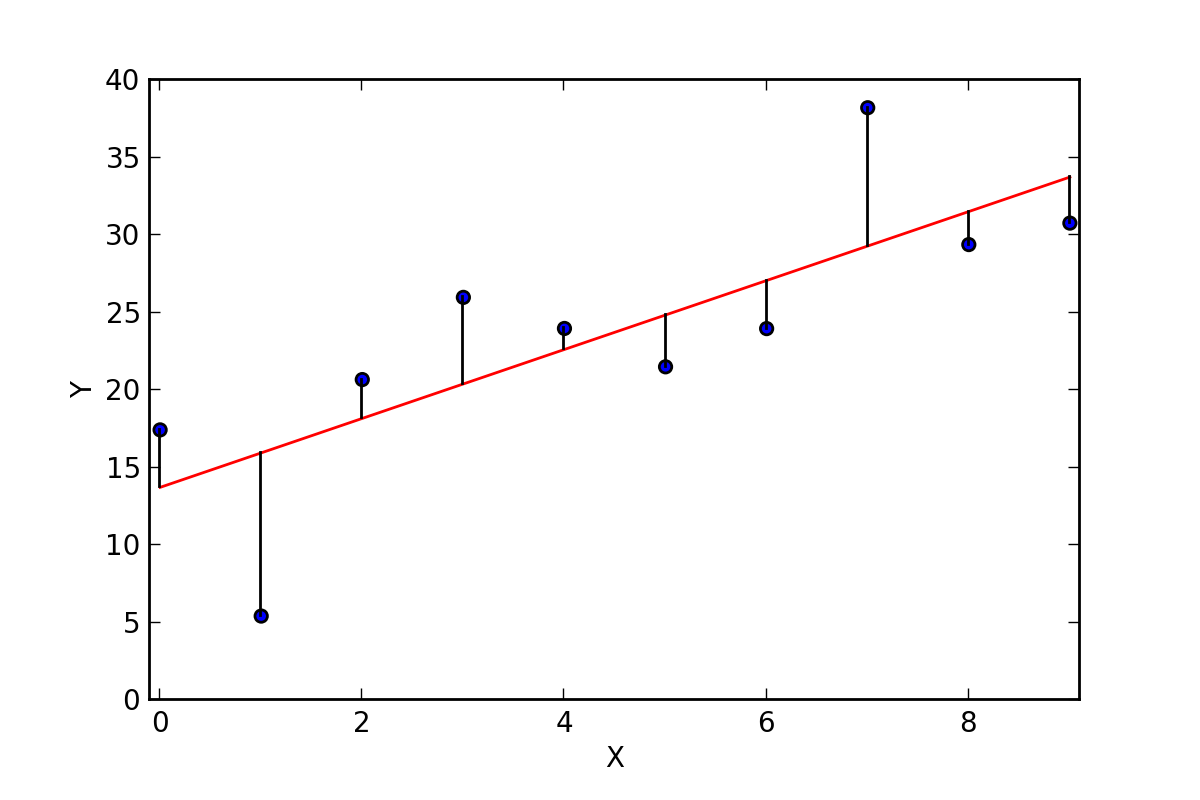


### Decomposing error, $E[SSE]$
To construct a good model, we need to find a good **balance between bias and variance** in a way that it minimizes ***total error*** which can be stated as $E[SSE]$:

The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance** ($variance$)
> $E[\hat{y} - E[\hat{y}]]^2$
>
> How much do predictions differ amongst themselves (different $\hat{y}$). 
1. **$\sigma^2$** - **Irreducible Error** 

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.

### Suppose we want to build a model to best predict $y$ using $X$.
_(refer to intuition deck to explain from bulls-eye representation) [source](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)_

#### Bias:  The average difference between our model prediction $\hat{y}$ and the truth $y$.

- **No bias**: On average, our ***predictions are correct***.
- As **bias increases**, our ***predictions***, on average, get ***more and more incorrect***.
- **High bias**: _Low_ accuracy -> ***underfit***

#### Variance: The amount of variation in our model predictions.

- **No variance**: Our ***predictions*** consistently hit the ***same value (or, are tighly packed)***.
- As **variance increases**, our predictions get ***more and more spread out***.
- **High variance**: _high_ accuracy on train (but doesnt do well on unseen test) -> ***overfit***

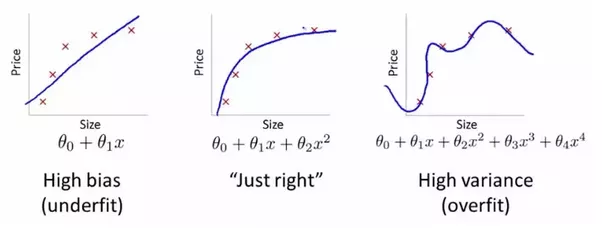

Notice in the figure above, the data points are the same across all 3 plots, but the model representing the relationship between Price and Size is different figure-to-figure:
- *High variance*: We are modeling the noise -- not the data. _(figure 3)_
- *High bias*: We are missing the signal, because our model is not complex enough to represent it! _(figure 1)_
- figure 2 shows a model that isn't modeling noise like _(figure 3)_ and is quite representative of the relationship between Price and Size

### Activity:  Underfit or Overfit

### Scenario A

<details><summary>Suppose we try to model commute time, given only the number of Metro stops per ride.

Which characteristics are likely?
    
- Bias (high / low)
- Variance (high / low)
- Accuracy (high / low)
- Underfit (likely / unlikely)
- Overfit (likely / unlikely)
    
</summary>
    
Since we are only including the number of metro stops in the model, this is likely to have high bias, low variance, low accuracy, and be underfit.
    
</details>

### Scenario B

<details><summary>Suppose we try to model commute time with Metro stops, cups of coffee you had today, the number of miles you live from GA, sock color, shoe size, average walking speed, and if you've seen a PT cruiser (limited edition) today or not. --> we're simply increasing the number of features from just 1 to many here.

Which characteristics are likely?
    
 - Bias (high / low)
- Variance (high / low)
- Accuracy (high / low)
- Underfit (likely / unlikely)
- Overfit (likely / unlikely)
    
</summary>
    
Since we are only including lots of noise in the model, this is likely to have low bias, high variance, high accuracy (on train but bad accuracy on test), and be overfit.
    
</details>

## Why Does Bias Occur?

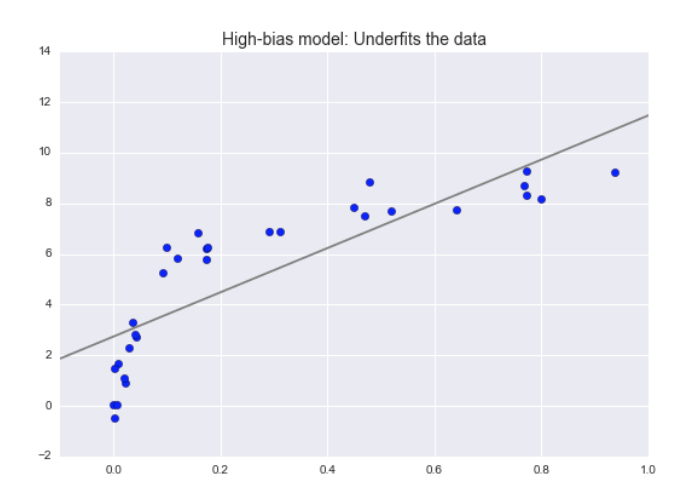

Basically, **more bias** points us to believe our ***model is too simple*** (like, linear regression).

- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line. _(like, the polynomial regression example introduced in the intuition deck)_
- When we rely on simplifying assumptions that aren’t valid (i.e. linearity), we can run into high bias. _(recap: LINE assumptions for linear regression)_
 - Linear regression is a method where we might suffer from high bias.

## Why Does Variance Occur?

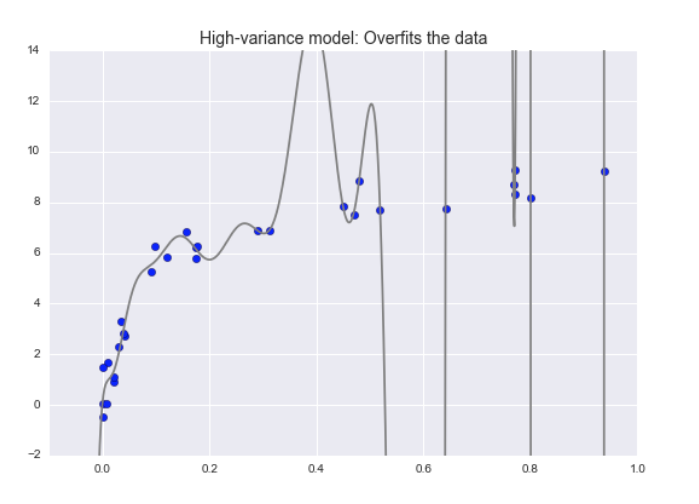

Basically, **more variance** points us to believe our ***model is too complex***.

- Our model $\hat{y}$ matches our data too closely.
- May not perform well on data it hasn't seen yet. 
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't. (high train accuracy but bad test accuracy)

## Signal and Noise - what are we modeling?
![](../imgs/signal-noise.jpg)

If there is a relationship between $X$ and $y$, we are seeking to discover it based on data already available to us, so that we can then apply this discovered relationship to **predict** $y$ for new values of $X$. If we detect _legitimate relationship between $X$ and $y$_, this is the **signal**. All the other randomness is just **noise**. If we ***overfit*** our model, we end up **"modeling the noise"**. Sometimes what we do is referred to _"separating signal from noise"_.

## The Tradeoff

One **goal of predictive modeling** is to find the optimal "sweet spot" in which we _minimize our error_.  One common strategy that we've discussed deals with **cross-validation**, which entails testing the accuracy of our model on unseen data, then evaluating if it's overfit or not.  Ideally, we're trying to find the ***best balance of bias and variance*** that allows us to understand well from existing data, and generalize well to new data.

### Increasing Model Complexity _(to the right of optimum model complexity)_
- Bias decreases 
- Variance increases (the model is more squigly)
<center><h2> $Total Error (E[SSE]) = \text{bias}^2 + variance + \sigma^2$</h2></center>

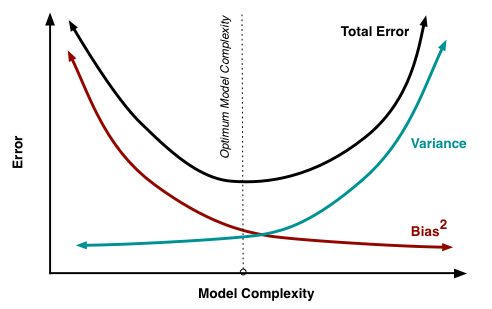

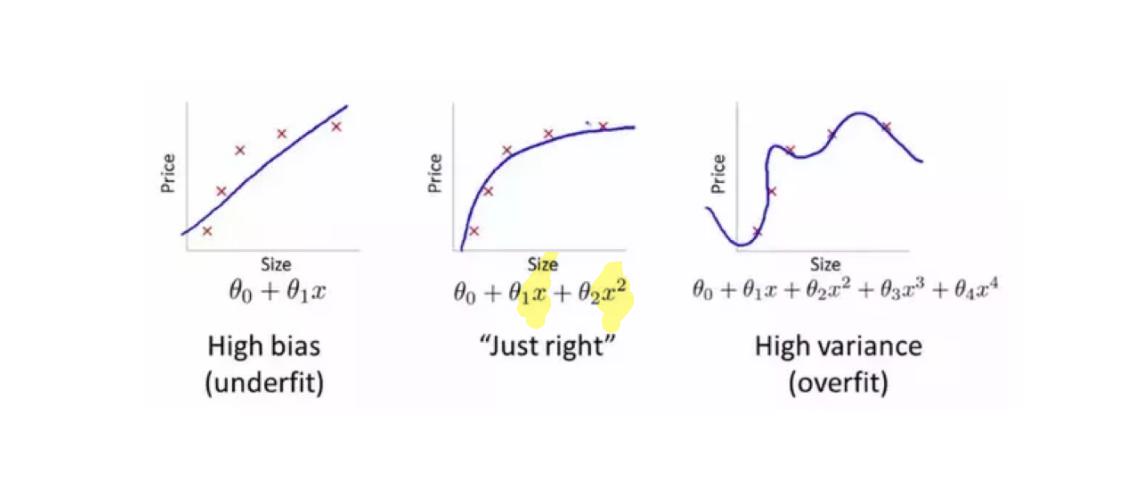

## So how can we fix it?

<details><summary>If your model has error due to HIGH BIAS (or is UNDERFIT):
</summary>
    
- Get more data
- Get a better sample of data
- INCREASE complexity of model (infer from Trade off graph above)
    
</details>

<details><summary>If your model has error due to HIGH VARIANCE (or is OVERFIT):
</summary>
    
- Get more data
- Get a better sample of data
- DECREASE complexity of model (infer from Trade off graph above)
- Regularize (we'll cover more in a future lesson)
    
</details>

The goal we typically have in mind with modeling is to **generalize** our estimations well.  Understanding the **bias** and **variance** tradeoff helps us understand **underfitting** and **overfitting**.

## Balanced Bias-Variance Tradeoff in the Streets, Overfitter in the (Jupyter Note)sheets

![](../imgs/car-view.jpg)

Is being overfit _really_ that bad? Turns out, not always!

It's totally possible for you to continue overfitting your model and to have out-of-sample errors continue to improve (more slowly) as well! In fact, most _image-based ML models_ are _drastically_ overfit. Specifically, the ones that self-driving cars use to detect obstacles. Does that scare you?

## Interview Question #1


<details><summary>What are the three types of error in a Machine Learning model? Briefly describe them.
</summary>
    
1. Bias - error caused by choosing an algorithm that does a poor job at modeling the signal in the data, i.e. the model is bad. For example, using linear regression to model highly non-linear data would result in error due to bias. <br>
2. Variance - error caused by a model not generalizing well to new data, or being overfit to the training data. <br>
3. Irreducible error - error caused by noise in the data that cannot be removed through modeling.
    
</details>

## Interview Question #2

<details><summary>What is the bias-variance trade-off?
</summary>
    
Bias occurs when your model is too simple and is not picking up on the complexities in the dataset (underfit). Variance occurs when your model is too complex and is modeling too much noise in the data, therefore not generalizing well to new data (overfit). The bias-variance trade off is the trade off between underfitting and overfitting. The goal of building a good machine learning model should be a balance between bias and variance: good enough to get accurate predictions but general enough to perform well on unseen data.
    
</details>

---
## Practice

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get mammals data: data/mammals.txt
# you'll notice because of the way information is stored on this file
# the output is not in our ideal workable format
mammals = pd.read_csv('../data/mammals.txt')
mammals.head(2)

Brain Weight\tBody Weight
0               3.385\t44.5
1                0.48\t15.5

In [3]:
# we can make some adjustments to the import with read_csv parameters
mammals = pd.read_csv('../data/mammals.txt', sep = '\t', # sep: separator
                      names = ['brain', 'body'], header = 0) #names: col names, header = 0 to replace header
print(mammals.shape)
mammals.head()

(64, 2)


brain   body
0    3.385   44.5
1    0.480   15.5
2    1.350    8.1
3  465.000  423.0
4   36.330  119.5

In [4]:
# Just for today, let's drop some of the larger values.
# Of course in real life you don't just randomly do this. This is
# only for example.

# save original to come back to it later
mammals_old = mammals
print(mammals_old.shape)
mammals_old.head() # same as mammals.head() that we did above

(64, 2)


brain   body
0    3.385   44.5
1    0.480   15.5
2    1.350    8.1
3  465.000  423.0
4   36.330  119.5

In [5]:
# let's keep only mammals with body size < 200
# one way to tell how many rows would such a filter return? sum() 
# below sums all the Trues (or 1s) internally from applying this filter
(mammals['body'] < 200).sum()

51

In [6]:
# keep mammals with body size < 200
mammals = mammals[mammals['body'] < 200].copy() # creating a copy of the df to avoid any downstream warnings for df changes
mammals.shape # overwritten mammals dataframe shape after applying filter 

(51, 2)

#### Seaborn Linear Regression plot:
lmplot() Plots and regression model fits data
- we used regplot() before to fit and plot linear reg best fit line. regplot() and lmplot() are closely related
- but the former is an axes-level function while the latter is a figure-level function that combines regplot() and FacetGrid (Multi-plot grid)
- seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)

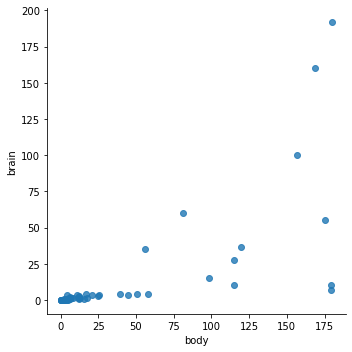

In [7]:
# ci = False      --> Don't show confidence band
# fit_reg = False --> Don't show regression line
# for the below plot, we could just use regplot() as well, since we don't have multiple-plots
sns.lmplot(x = 'body', y = 'brain', 
           data = mammals, ci = False, fit_reg = False);

### Let's Avenger's Infinity War our dataset

In [8]:
# Randomly assign every observation to either universe 1 or universe 2.

np.random.seed(123) # to replicate same results for all of us on downstream np.random operations
# randint() returns random integers from `low` (inclusive) to `high` (exclusive) [universe 1 or 2 for our scenario]
mammals['universe'] = np.random.randint(low=1, high=3, size=len(mammals))
print(mammals.shape)
mammals.head()

(51, 3)


brain   body  universe
0   3.385   44.5         1
1   0.480   15.5         2
2   1.350    8.1         1
4  36.330  119.5         1
5  27.660  115.0         1

In [9]:
# note: if we didn't pass size in np.random.randint(), the function will only return 1 value
# that will get assigned to all rows of df
np.random.randint(1, 3)

2

### How are Bias and Variance here?

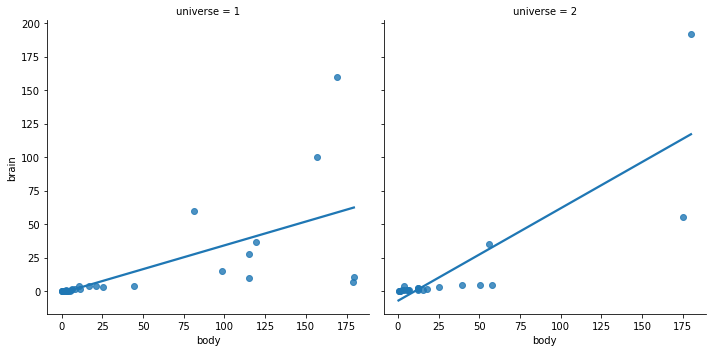

In [10]:
# Two plots for each universe
# here lmplot() is a better option vs regplot() given we want multi-plots
# col is used to define subsets of the data (universe 1 and 2 will be split to different plots)
sns.lmplot(x = 'body', y = 'brain', data = mammals, 
           col = 'universe', ci = False); 

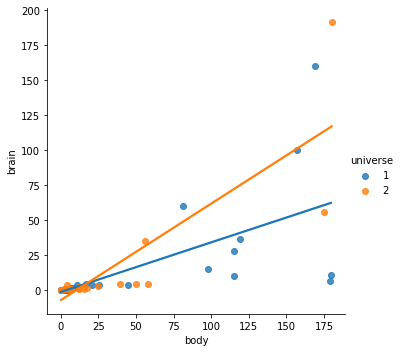

In [11]:
# Also try hue='universe'--> returns 1 plot with different color on col passed to hue
sns.lmplot(x = 'body', y = 'brain', data = mammals, 
           hue = 'universe', ci = False);

### We can see a linear regression fit is not representative of the relationship between our variables

### Let's DO IT LIVE!
Let's play with the `order=k` parameter and find a good bias-var tradeoff.

By passing order>1, we are moving away from linear regression and trying to fit a polynomial regression to see if it can better fit our data

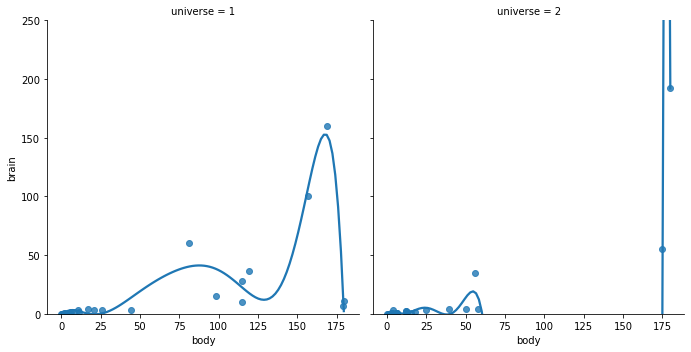

In [19]:
# Fitting a higher-order polynomial regression with order=8
# order = 8 translates to x^8 in regression equation, so there will be x, x^2, x^3...x^8 higher orders
sns.lmplot(x = 'body', y = 'brain', data = mammals,
           col = 'universe', ci = False, order = 8)
plt.ylim(0,250);

Sometimes, if the order passed is too high, we might get a Rank Warning. Because, under the hood, to solve for coefficients that minimize the SSE, we are [inverting a matrix](https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/). This happens when "the [rank](https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/real-euclidean-vector-spaces/the-rank-of-a-matrix) of the coefficient matrix in the least-squares fit is deficient" ([numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)).
- a RankWarning is returned when the least-squares fit is badly conditioned. This implies that the best fit is not well-defined due to numerical error. **The results may be improved by lowering the polynomial degree.**

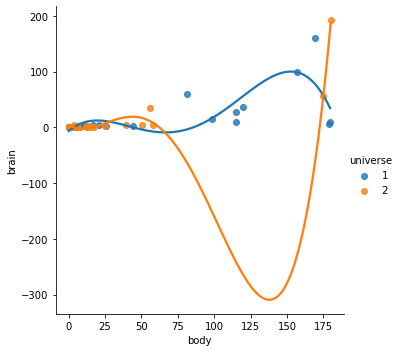

In [13]:
# reducing the order, starts to better fit the data
sns.lmplot(x = 'body', y = 'brain', data = mammals,
           hue = 'universe', ci = False, order = 4);

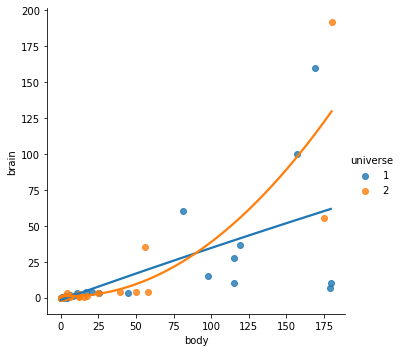

In [14]:
sns.lmplot(x = 'body', y = 'brain', data = mammals,
           hue = 'universe', ci = False, order = 2);

In [15]:
# Allometry - the study of the relationships and ratios of animal body sizes
# exponential
# logs!
mammals_old.shape

(64, 2)

The Allometric equation that explains the relationship between two measured quantities can be written in logarithimic form ([source: wikipedia](https://en.wikipedia.org/wiki/Allometry))

In [16]:
# natural log of the brain column
mammals_old['log_brain'] = np.log(mammals_old['brain'])

In [17]:
# natural log of the body column
mammals_old['log_body'] = np.log(mammals_old['body'])

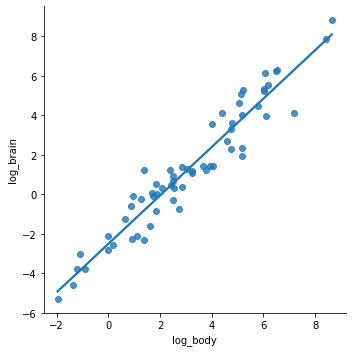

In [18]:
# relationship between the log_measures
sns.lmplot(x = 'log_body', y = 'log_brain', data = mammals_old,
           ci = False);

This behavior of log transforming variables making the relationship linear is because of how log works, similar to differentiation, the orders on variables become multipliers
- for allometric equation (exponential function): $y = kx^a$ --> polynomial fit
- logarithmic form: $log$ $y$ = $a$ $log$ $x$ + $log$ $k$--> linear fit